# Importing:

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd

# Implement the Neural Network:

## Linear Layers:

In [2]:
class Layer:
    def __init__(self):
        self.input  = None 
        self.output = None

    def __call__(self, input: np.ndarray) -> np.ndarray:
        return self.forward(input)
    
    def forward(self, input: np.ndarray) -> np.ndarray:
        raise NotImplementedError
    
    def backward(self, up_graad: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def step(self, learning_rate: float) -> None:
        pass        

## Activation Functions:


## Loss Functions:

In [3]:
class Loss:
    def __init__(self):
        self.predicted = None
        self.target    = None
        self.loss      = None
    
    def __call__(self, prediction: np.ndarray, target: np.ndarray) -> float:
        return self.forward(prediction, target)
    
    def forward(self, prediction:np.ndarray, target: np.ndarray) -> float:
        raise NotImplementedError
    
    def backward(self) -> np.ndarray:
        raise NotImplementedError        

## Neural Network:

In [4]:
class MLP:
    def __init__(self, layers: list[Layer], loss_func: Loss, learning_rate: float) -> None:
        self.layers        = layers
        self.loss_func     = loss_func
        self.learning_rate = learning_rate
    
    def __call__(self, input: np.ndarray) -> np.ndarray:
        return self.forward(input)
    
    def forward(self, input: np.ndarray) -> np.ndarray:
        """ pass input through each layer sequentially """
        for layer in self.layers:
            input = layer.forward(input)
        return input
    
    def loss(self, prediction: np.ndarray, target: np.ndarray) -> float:
        """Calculate Loss"""
        return self.loss_func(prediction, target)
    
    def backward(self) -> None:
        up_grad = self.loss_func.backward()
        for layer in reversed(self.layers):
            up_grad = layer.backward(up_grad)
    
    def update(self) -> None:
        for layer in self.layers:
            layer.step(self.learning_rate)
    
    def train(self, x_train: np.ndarray, y_train: np.ndarray, epochs: int, batch_size: int) -> np.ndarray:
        losses = np.empty(epochs)
        for epoch in (pbar := trange(epochs)):
            running_loss = 0.0
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                #Forward pass:
                prediction = self.forward(x_batch)

                #Compute loss:
                running_loss += self.loss(prediction, y_batch) * batch_size

                #Backward pass:
                self.backward()

                #Update the parameters:
                self.update()
            
            #Normalize running loss by total number of samples:
            running_loss /= len(x_train)
            pbar.set_description(f"Loss: {running_loss:.3f}")
            losses[epoch] = running_loss

        return losses

# Use MLP to solve a problem: 

## Investigating the Fashion-MNIST dataset:

In [5]:
fashion_mnist = fetch_openml("Fashion-MNIST", parser='auto')

In [6]:
print(type(fashion_mnist))
print(f"type of the fashion_mnist: {type(fashion_mnist)} \n")
print(f"keys of the fashion_mnist: {fashion_mnist.keys()}")

<class 'sklearn.utils._bunch.Bunch'>
type of the fashion_mnist: <class 'sklearn.utils._bunch.Bunch'> 

keys of the fashion_mnist: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


### Examining data:

In [7]:
print(type(fashion_mnist['data']))

<class 'pandas.core.frame.DataFrame'>


In [8]:

print(f"shape of the dataset: {fashion_mnist['data'].shape}")
print(f"data of the fashion_mnist: {fashion_mnist['data'].head()}")


shape of the dataset: (70000, 784)
data of the fashion_mnist:    pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       1       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0      33   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...       119       114       130        76         0         0   
2       22  ...         0         0         1         0         0         0   
3       96  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   



#### Indexing explained:
- fashion_mnist['data'].shape[0] = 70000 → number of images (indexes from 0 to 69999).
- fashion_mnist['data'].shape[1] = 784 → number of pixels in each image (indexes from 0 to 783)

#### So:
- When you do fashion_mnist['data'][index] — you are selecting the entire image at that row index (a 1D array of 784 pixels).

- When you do fashion_mnist['data'][index][pixel] — you are selecting a single pixel value from the image at index.


In [9]:
# Access first row (image 0) in the DataFrame
first_image_row = fashion_mnist['data'].iloc[0]  # iloc for positional indexing

print(first_image_row)  # This is a pandas Series with pixel columns

# Access pixel 0 value in this row:
print(first_image_row.iloc[0])

# Or simply chain:
print(fashion_mnist['data'].iloc[0].iloc[0])


pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64
0
0


In [10]:
print(f"feature names of the fashion_mnist: {fashion_mnist['feature_names']}")
print(f"target names of the fashion_mnist: {fashion_mnist['target_names']}")

feature names of the fashion_mnist: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pix

In [11]:
#The dataset’s target_names list only contains the name of the target column, which is "class".
target_names = fashion_mnist['target_names']

print(type(target_names))

print(len(target_names))

for i in target_names:
    print(f"i: {i}")
    print(type(i))



<class 'list'>
1
i: class
<class 'str'>


### PLot the MNIST:

First image pixel array shape: (784,)
First pixel value of first image: 0
Label number: 9
Label name: Ankle boot


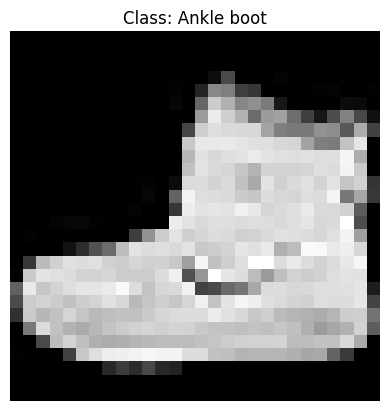

In [12]:
import matplotlib.pyplot as plt

# Suppose fashion_mnist is loaded as a dictionary with pandas DataFrames/Series
# Example class names mapping:
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

index = 0  # Index of the image to examine

# Access image pixels as pandas Series and convert to numpy array
image_pixels = fashion_mnist['data'].iloc[index].values

# Access first pixel value
first_pixel_value = image_pixels[0]

# Access label
label = fashion_mnist['target'].iloc[index]

print(f"First image pixel array shape: {image_pixels.shape}")  # Should be (784,)
print(f"First pixel value of first image: {first_pixel_value}")
print(f"Label number: {label}")
print(f"Label name: {class_names[int(label)]}")

# Reshape to 28x28 for visualization
image_2d = image_pixels.reshape(28, 28)

# Plot the image
plt.imshow(image_2d, cmap='gray')
plt.title(f"Class: {class_names[int(label)]}")
plt.axis('off')
plt.show()


### Summary:

summary of the **Fashion MNIST dataset** :

**Fashion MNIST Dataset – Full Summary**

* **What it is**:
  A benchmark dataset for machine learning, used to train and evaluate image classification models on clothing item recognition.

* **Total Samples**: **70,000 grayscale images**

  * **60,000 training samples**
  * **10,000 test samples**

* **Image Details**:

  * Each image is **28 × 28 pixels** = **784 pixels total**
  * Stored as a **flattened 1D array of 784 values**
  * Each pixel is a **grayscale intensity**: value between **0 (black)** and **255 (white)**

* **Features**:

  * Named `pixel1`, `pixel2`, ..., `pixel784`
  * Represent the brightness level of each pixel
  * No color (only black and white shades)

* **Target Labels**:
  One label per image, from **0 to 9**, representing the clothing type

| Label | Clothing Item |
| ----- | ------------- |
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

* **Data Format**:
  * Usually loaded as a **dictionary-like object**
  * Keys: `'data'`, `'target'`, `'feature_names'`, `'target_names'`, `'DESCR'`, etc.
  * `data` contains pixel values
  * `target` contains class labels
  * `frame` (if available) is a `pandas.DataFrame` with both




## Preparing the Fashion-MNIST dataset:

#### Min-Max normalization:
Certainly! Here's the general **min-max normalization formula**, which scales a value $x$ from its original range $[x_{\text{min}}, x_{\text{max}}]$ to a new range $[a, b]$:

$$
x_{\text{norm}} = a + \left( \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} \right) \times (b - a)
$$

#### Special Case: Normalize to $[-1, 1]$

$$
x_{\text{norm}} = \frac{2(x - x_{\text{min}})}{x_{\text{max}} - x_{\text{min}}} - 1
$$

#### Min-Max Normalization: From $[0, 255]$ to $[-1, 1]$

To normalize a value $x \in [0, 255]$ into the range $[-1, 1]$, you can use the **min-max normalization** formula:

Sure! To normalize a value $x \in [0, 255]$ into the range $[-1, 1]$, you use this **min-max normalization** formula:

$$
x_{\text{norm}} = \frac{2x}{255} - 1
$$

##### Explanation:

This follows directly from:

$$
x_{\text{norm}} = \frac{2(x - x_{\text{min}})}{x_{\text{max}} - x_{\text{min}}} - 1
$$

Where:

* $x_{\text{min}} = 0$
* $x_{\text{max}} = 255$

Plug in:

$$
x_{\text{norm}} = \frac{2(x - 0)}{255 - 0} - 1 = \frac{2x}{255} - 1
$$

This maps:

* $x = 0 \rightarrow -1$
* $x = 127.5 \rightarrow 0$
* $x = 255 \rightarrow +1$

In [13]:
def get_data(filter_classes):
    fashion_mnist = fetch_openml("Fashion-MNIST", parser='auto')
    x, y = fashion_mnist['data'], fashion_mnist['target'].astype(int)
    # Remove classes
    filtered_indices = np.isin(y, filter_classes)
    x, y = x[filtered_indices].to_numpy(), y[filtered_indices]
    # Normalize the pixels to be in [-1, +1] range
    x = ((x / 255.) - .5) * 2
    removed_class_count = 0
    for i in range(10):  # Fix the labels
        if i in filter_classes and removed_class_count != 0:
            y[y == i] = i - removed_class_count
        elif i not in filter_classes:
            removed_class_count += 1
    # Do the train-test split
    return train_test_split(x, y, test_size=10_000)

## Loading the Fashion-MNIST Dataset:

In [14]:
def onehot_encoder(y, num_labels):
    one_hot = np.zeros(shape=(y.size, num_labels), dtype=int)
    one_hot[np.arange(y.size), y] = 1
    return one_hot

class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
               3: 'Dress', 4: 'Coat', 5:  'Sandal', 6: 'Shirt',
               7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

kept_classes = [0, 1, 7] #t_shirt, trouser, sneaker

x_train, x_test, y_train, y_test = get_data(kept_classes)

# One-hot encode the target labels of the training set
y_train = onehot_encoder(y_train, num_labels=len(kept_classes))

## Training the Network